In [1]:
import MDAnalysis as mda

In [2]:
from MDAnalysis.analysis.dihedrals import Dihedral, Ramachandran

In [3]:
import matplotlib.pyplot as plt

In [4]:
from math import floor

In [5]:
residues = [20, 40, 60, 80, 100, 120, 140]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("ticks", {"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8, 'font.family': ['Liberation Sans']})

/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


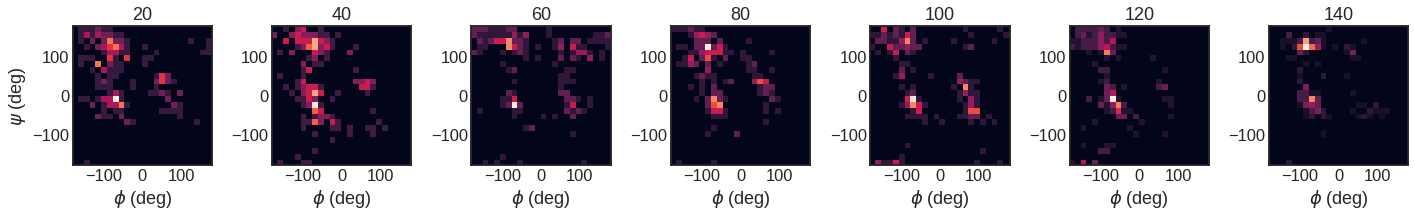

In [15]:
sim='ensemble'
Nbins = 24
residues = [20, 40, 60, 80, 100, 120, 140]
step=1#int(floor(len(u.trajectory)/1000))


XTC = '../ensemble/ensemble.dcd'
PDB = '../ensemble/18.rebuilt.pdb'

u = mda.Universe(PDB, XTC)

fig, ax = plt.subplots(nrows=1, ncols=len(residues),figsize=(20,9))

for n, el in enumerate(residues):
    ax[n].set_aspect('equal')
    nres = str(el)
    r = u.select_atoms("resid "+nres)
    R = Ramachandran(r).run(step=step)
    ax[n].set_title(nres)

    x = R.angles[:, :, 0].flatten()
    y = R.angles[:, :, 1].flatten()

    ax[n].hist2d(x, y, bins=(Nbins, Nbins), range=[[-180,180], [-180,180]])
    ax[n].set_xlabel('$\phi$ (deg)')
    if n==0:
        ax[n].set_ylabel('$\psi$ (deg)')
    ax[n].set_xlim([-180,180])
    ax[n].set_ylim([-180,180])
    ax[n].set_aspect('equal')

plt.tight_layout()
plt.savefig("rama-"+sim+".pdf", dpi=300)

In [18]:
u.residues[0].resid

1

/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


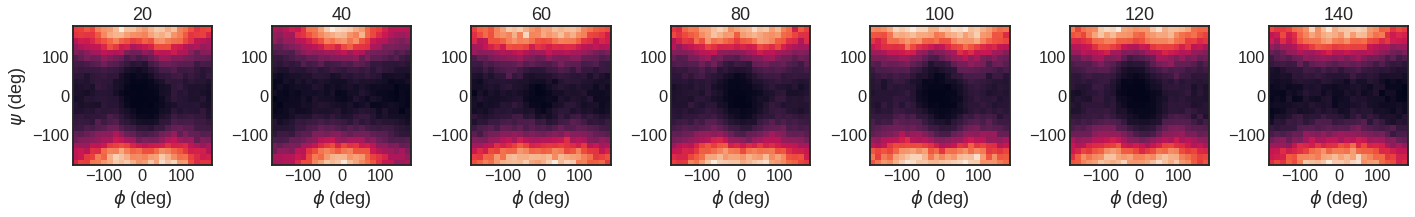

In [85]:
sim='ref'
Nbins = 24
residues = [20, 40, 60, 80, 100, 120, 140]
step=1#int(floor(len(u.trajectory)/1000))


PDB = "/data/nsalvi/hnRNPA2_HPS/cmap_test/ref/1/CG.pdb"
XTC = "/data/nsalvi/hnRNPA2_HPS/cmap_test/ref/1/nopbc.dcd"


u = mda.Universe(PDB, XTC)

fig, ax = plt.subplots(nrows=1, ncols=len(residues),figsize=(20,9))

for n, el in enumerate(residues):
    ax[n].set_aspect('equal')
    nres = str(el)
    r = u.select_atoms("resid "+nres)
    R = Ramachandran(r).run(step=step)
    ax[n].set_title(nres)

    x = R.angles[:, :, 0].flatten()
    y = R.angles[:, :, 1].flatten()

    ax[n].hist2d(x, y, bins=(Nbins, Nbins), range=[[-180,180], [-180,180]])
    ax[n].set_xlabel('$\phi$ (deg)')
    if n==0:
        ax[n].set_ylabel('$\psi$ (deg)')
    ax[n].set_xlim([-180,180])
    ax[n].set_ylim([-180,180])
    ax[n].set_aspect('equal')

plt.tight_layout()
plt.savefig("rama-"+sim+".pdf", dpi=300)

/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


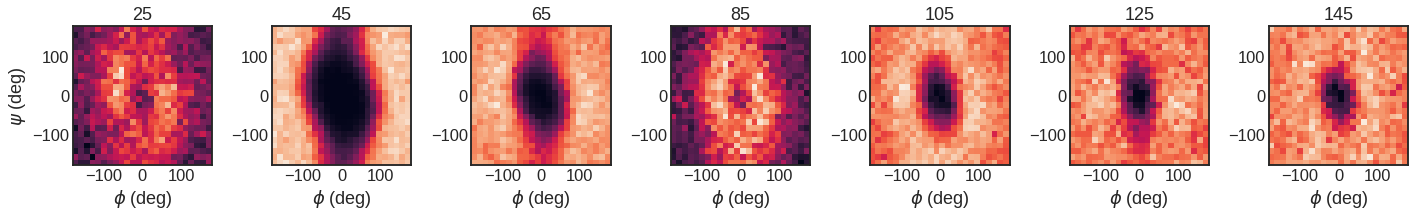

In [18]:
sim='ref-no-phi-psi'
Nbins = 24
residues = [25, 45, 65, 85, 105, 125, 145]
step=1#int(floor(len(u.trajectory)/1000))


PDB = "/data/nsalvi/hnRNPA2_HPS/cmap_optim/ref_no_phi_psi/1/CG.pdb"
XTC = "/data/nsalvi/hnRNPA2_HPS/cmap_optim/ref_no_phi_psi/all.dcd"


u = mda.Universe(PDB, XTC)

fig, ax = plt.subplots(nrows=1, ncols=len(residues),figsize=(20,9))

for n, el in enumerate(residues):
    ax[n].set_aspect('equal')
    nres = str(el)
    r = u.select_atoms("resid "+nres)
    R = Ramachandran(r).run(step=step)
    ax[n].set_title(nres)

    x = R.angles[:, :, 0].flatten()
    y = R.angles[:, :, 1].flatten()

    ax[n].hist2d(x, y, bins=(Nbins, Nbins), range=[[-180,180], [-180,180]])
    ax[n].set_xlabel('$\phi$ (deg)')
    if n==0:
        ax[n].set_ylabel('$\psi$ (deg)')
    ax[n].set_xlim([-180,180])
    ax[n].set_ylim([-180,180])
    ax[n].set_aspect('equal')

plt.tight_layout()
plt.savefig("rama-"+sim+".pdf", dpi=300)

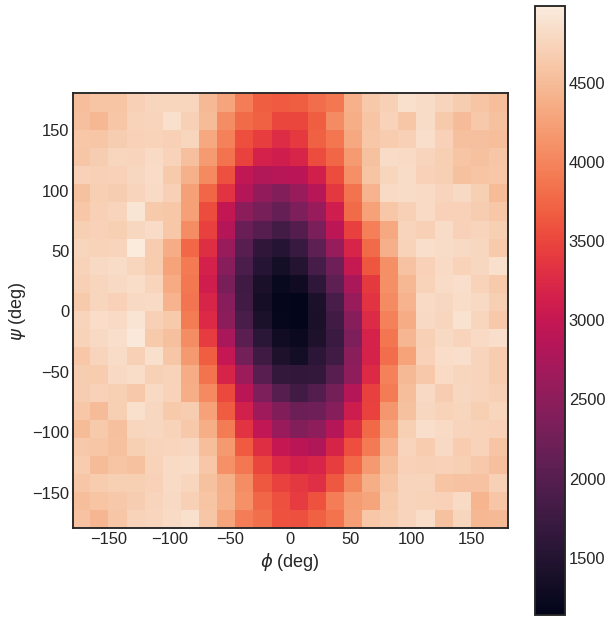

In [17]:
sim='ref-no-phi-psi'
Nbins = 24
step=10#int(floor(len(u.trajectory)/1000))


PDB = "/data/nsalvi/hnRNPA2_HPS/cmap_optim/ref_no_phi_psi/1/CG.pdb"
XTC = "/data/nsalvi/hnRNPA2_HPS/cmap_optim/ref_no_phi_psi/all.dcd"


u = mda.Universe(PDB, XTC)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(9,9))

ax.set_aspect('equal')
r = u.select_atoms("protein")
R = Ramachandran(r).run(step=step)

x = R.angles[:, :, 0].flatten()
y = R.angles[:, :, 1].flatten()

f=ax.hist2d(x, y, bins=(Nbins, Nbins), range=[[-180,180], [-180,180]])
ax.set_xlabel('$\phi$ (deg)')
ax.set_ylabel('$\psi$ (deg)')
ax.set_xlim([-180,180])
ax.set_ylim([-180,180])
ax.set_aspect('equal')
plt.colorbar(f[3])

plt.tight_layout()
plt.savefig("all-rama-"+sim+".pdf", dpi=300)

In [7]:
import numpy as np

/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "
/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/analysis/dihedrals.py:324: UserWarning: Cannot determine phi and psi angles for the first or last residues
  warnings.warn("Cannot determine phi and psi angles for the first "


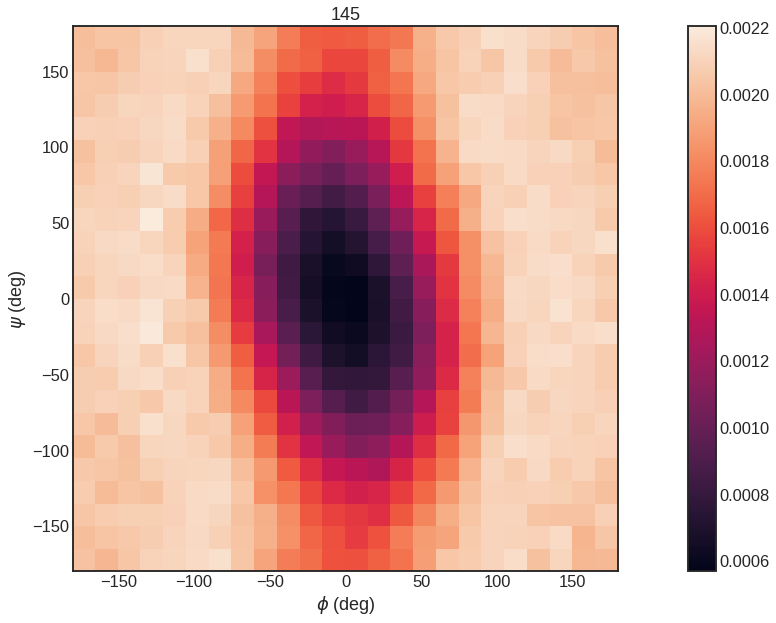

In [29]:
sim='ref-no-phi-psi'
Nbins = 24
step=10#int(floor(len(u.trajectory)/1000))


PDB = "/data/nsalvi/hnRNPA2_HPS/cmap_optim/ref_no_phi_psi/1/CG.pdb"
XTC = "/data/nsalvi/hnRNPA2_HPS/cmap_optim/ref_no_phi_psi/all.dcd"


u = mda.Universe(PDB, XTC)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20,9))

ax.set_aspect('equal')
r = u.select_atoms("protein")
R = Ramachandran(r).run(step=step)
ax.set_title(nres)

x = R.angles[:, :, 0].flatten()
y = R.angles[:, :, 1].flatten()

rp = ax.hist2d(x, y, bins=(Nbins, Nbins), range=[[-180,180], [-180,180]])
ax.set_xlabel('$\phi$ (deg)')
if n==0:
    ax.set_ylabel('$\psi$ (deg)')
ax.set_xlim([-180,180])
ax.set_ylim([-180,180])
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig("all-rama-"+sim+".pdf", dpi=300)

#R = Ramachandran(r).run(step=step)
R = np.concatenate(R.angles)
CGphi=R[:, 0]
CGpsi=R[:, 1]
NpointsFM = len(CGpsi)
            
indsCGphi = np.digitize(CGphi, bin_i)
            
all_values = []
    
for bcounter, bi in enumerate(bin_i):
    selectedCGpsi = [el for acounter, el in enumerate(y) if indsCGphi[acounter]==bcounter+1]
    indsCGpsi = np.digitize(selectedCGpsi, bin_i)
    unique, counts = np.unique(indsCGpsi, return_counts=True)
    counts = dict(zip(unique, counts))
    popCG = [counts[acounter+1]/NpointsFM if (acounter+1) in counts.keys() else 0
                                     for acounter, el in enumerate(bin_i)]
    all_values.append(popCG)
    
#all_values = ndimage.rotate(all_values, 90)

all_values = convolve(all_values, Gaussian2DKernel(x_stddev=0.75, y_stddev=0.75))


all_values = all_values/np.sum(np.array(all_values))
                
rp = ax.imshow(all_values, interpolation=None)
ax.set_xlabel('$\phi$ (deg)')
ax.set_ylabel('$\psi$ (deg)')
ax.set_aspect('equal')
fig.colorbar(rp)

plt.tight_layout()
plt.savefig("all-rama-"+sim+"-2.pdf", dpi=300)

In [30]:
np.savetxt("convoluted-all-rama-ref-no-phi-psi.out", all_values)

In [8]:
import numpy as np
from scipy import ndimage

/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "
/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/analysis/dihedrals.py:324: UserWarning: Cannot determine phi and psi angles for the first or last residues
  warnings.warn("Cannot determine phi and psi angles for the first "
/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/analysis/dihedrals.py:324: UserWarning: Cannot determine phi and psi angles for the first or last residues
  warnings.warn("Cannot determine phi and psi angles for the first "


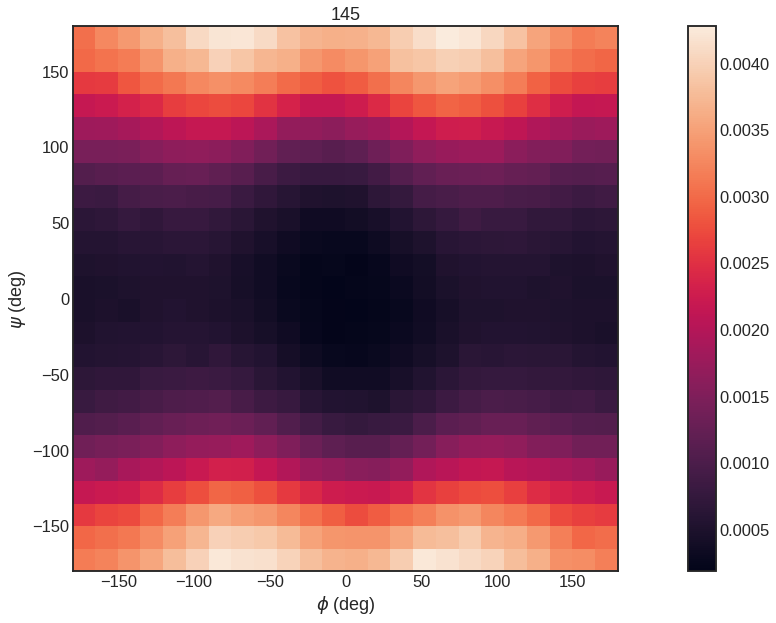

In [28]:
sim='ref'
Nbins = 24
step=10#int(floor(len(u.trajectory)/1000))


PDB = "/data/nsalvi/hnRNPA2_HPS/cmap_test/ref/1/CG.pdb"
XTC = "/data/nsalvi/hnRNPA2_HPS/cmap_test/ref/1/nopbc.dcd"


u = mda.Universe(PDB, XTC)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20,9))

ax.set_aspect('equal')
r = u.select_atoms("protein")
R = Ramachandran(r).run(step=step)
ax.set_title(nres)

x = R.angles[:, :, 0].flatten()
y = R.angles[:, :, 1].flatten()

rp = ax.hist2d(x, y, bins=(Nbins, Nbins), range=[[-180,180], [-180,180]])
ax.set_xlabel('$\phi$ (deg)')
if n==0:
    ax.set_ylabel('$\psi$ (deg)')
ax.set_xlim([-180,180])
ax.set_ylim([-180,180])
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig("all-rama-"+sim+".pdf", dpi=300)

R = Ramachandran(r).run(step=step)
R = np.concatenate(R.angles)
CGphi=R[:, 0]
CGpsi=R[:, 1]
NpointsFM = len(CGpsi)

delta = int(360/Nbins)
bin_i = [n for n in range(-180, 179, delta)]
            
indsCGphi = np.digitize(CGphi, bin_i)
            
all_values = []

    
for bcounter, bi in enumerate(bin_i):
    selectedCGpsi = [el for acounter, el in enumerate(y) if indsCGphi[acounter]==bcounter+1]
    indsCGpsi = np.digitize(selectedCGpsi, bin_i)
    unique, counts = np.unique(indsCGpsi, return_counts=True)
    counts = dict(zip(unique, counts))
    popCG = [counts[acounter+1]/NpointsFM if (acounter+1) in counts.keys() else 0
                                     for acounter, el in enumerate(bin_i)]
    all_values.append(popCG)
    
#all_values = ndimage.rotate(all_values, 90)
    
all_values = all_values/np.sum(np.array(all_values))
                
rp = ax.imshow(all_values, interpolation=None)
ax.set_xlabel('$\phi$ (deg)')
ax.set_ylabel('$\psi$ (deg)')
ax.set_aspect('equal')
fig.colorbar(rp)

plt.tight_layout()
plt.savefig("all-rama-ref2.pdf", dpi=300)

In [98]:
np.savetxt("convoluted-all-rama-ref.out", all_values)

In [9]:
from astropy.convolution import convolve
from astropy.convolution.kernels import Gaussian1DKernel, Gaussian2DKernel

In [10]:
import numpy as np
from scipy import ndimage

/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


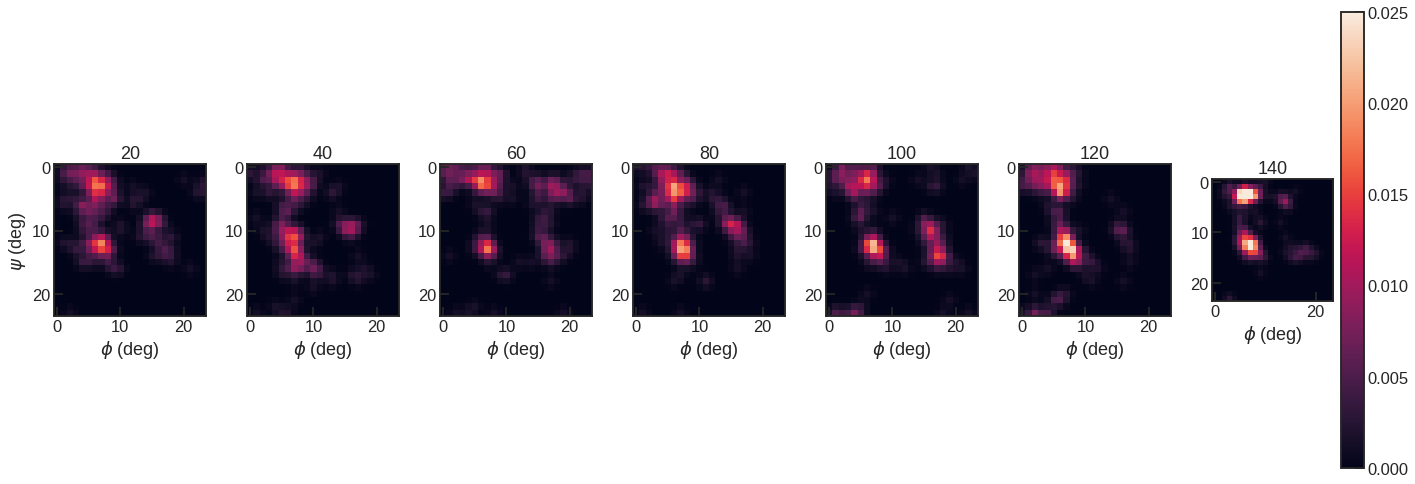

In [26]:
sim='ensemble'
Nbins = 24
residues = [20, 40, 60, 80, 100, 120, 140]
step=1#int(floor(len(u.trajectory)/1000))


XTC = '../ensemble/ensemble.dcd'
PDB = '../ensemble/18.rebuilt.pdb'

u = mda.Universe(PDB, XTC)

fig, ax = plt.subplots(nrows=1, ncols=len(residues),figsize=(20,9))

for n, el in enumerate(residues):
    ax[n].set_aspect('equal')
    nres = str(el)
    r = u.select_atoms("resid "+nres)
    R = Ramachandran(r).run(step=step)
    ax[n].set_title(nres)

    x = R.angles[:, :, 0].flatten() #phi
    y = R.angles[:, :, 1].flatten() #psi
    NpointsFM = len(x)
    
    delta = int(360/Nbins)
    bin_i = [n for n in range(-180, 179, delta)]
    
    indsFMphi = np.digitize(x, bin_i)
    
    all_values = []
    
    for bcounter, bi in enumerate(bin_i):
        selectedFMpsi = [el for acounter, el in enumerate(y) if indsFMphi[acounter]==bcounter+1]
        indsFMpsi = np.digitize(selectedFMpsi, bin_i)
        unique, counts = np.unique(indsFMpsi, return_counts=True)
        counts = dict(zip(unique, counts))
        popFM = [counts[acounter+1]/NpointsFM if (acounter+1) in counts.keys() else 0
                                     for acounter, el in enumerate(bin_i)]
        all_values.append(popFM)

    all_values = ndimage.rotate(all_values, 90)
    
    all_values = convolve(all_values, Gaussian2DKernel(x_stddev=0.75, y_stddev=0.75))
    
    all_values = all_values/sum(sum(all_values))
    
    rp = ax[n].imshow(all_values, interpolation=None, vmin=0, vmax=0.025)
    ax[n].set_xlabel('$\phi$ (deg)')
    if n==0:
        ax[n].set_ylabel('$\psi$ (deg)')
        fig.colorbar(rp)
    #ax[n].set_xlim([-180,180])
    #ax[n].set_ylim([-180,180])
    ax[n].set_aspect('equal')

plt.tight_layout()
plt.savefig("convoluted-rama-"+sim+".pdf", dpi=300)

In [11]:
from MDAnalysis.analysis import dihedrals


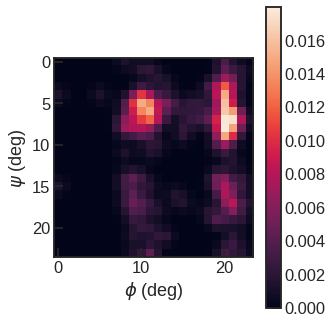

In [46]:
#read data necessary to calculate CMAPs

REFtop = "/data/nsalvi/hnRNPA2_HPS/cmap_test/ref/1/CG.pdb"
REFtraj = "/data/nsalvi/hnRNPA2_HPS/cmap_test/ref/1/nopbc.dcd"

u = mda.Universe(REFtop, REFtraj)  #
bonds = ((n, n+1) for n in range(len(u.atoms)-1))
u.add_bonds(bonds)
natoms = len(u.atoms)
residues = list(u.residues)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))

sel = u.select_atoms("protein")
R = dihedrals.Ramachandran(sel).run()
R = np.concatenate(R.angles)
CGphi=R[:, 0]
CGpsi=R[:, 1]
NpointsFM = len(CGpsi)
            
indsCGphi = np.digitize(CGphi, bin_i)
            
all_values = []
    
for bcounter, bi in enumerate(bin_i):
    selectedCGpsi = [el for acounter, el in enumerate(y) if indsCGphi[acounter]==bcounter+1]
    indsCGpsi = np.digitize(selectedCGpsi, bin_i)
    unique, counts = np.unique(indsCGpsi, return_counts=True)
    counts = dict(zip(unique, counts))
    popCG = [counts[acounter+1]/NpointsFM if (acounter+1) in counts.keys() else 0#1e-24
                                     for acounter, el in enumerate(bin_i)]
    all_values.append(popCG)
    
#all_values = ndimage.rotate(all_values, 90)

all_values = convolve(all_values, Gaussian2DKernel(x_stddev=0.75, y_stddev=0.75))

all_values = np.array([[all_values[n][m] if all_values[n][m] > 0 else 1e-24 for m in range(Nbins)] for n in range(Nbins)])

all_values = all_values/sum(sum(all_values))
                
rp = ax.imshow(all_values, interpolation=None)
ax.set_xlabel('$\phi$ (deg)')
ax.set_ylabel('$\psi$ (deg)')
ax.set_aspect('equal')
fig.colorbar(rp)

plt.tight_layout()
plt.savefig("convoluted-all-rama-ref.pdf", dpi=300)
            

In [47]:
np.savetxt("convoluted-all-rama-ref.out", all_values)

In [99]:
ref_rama = all_values

/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


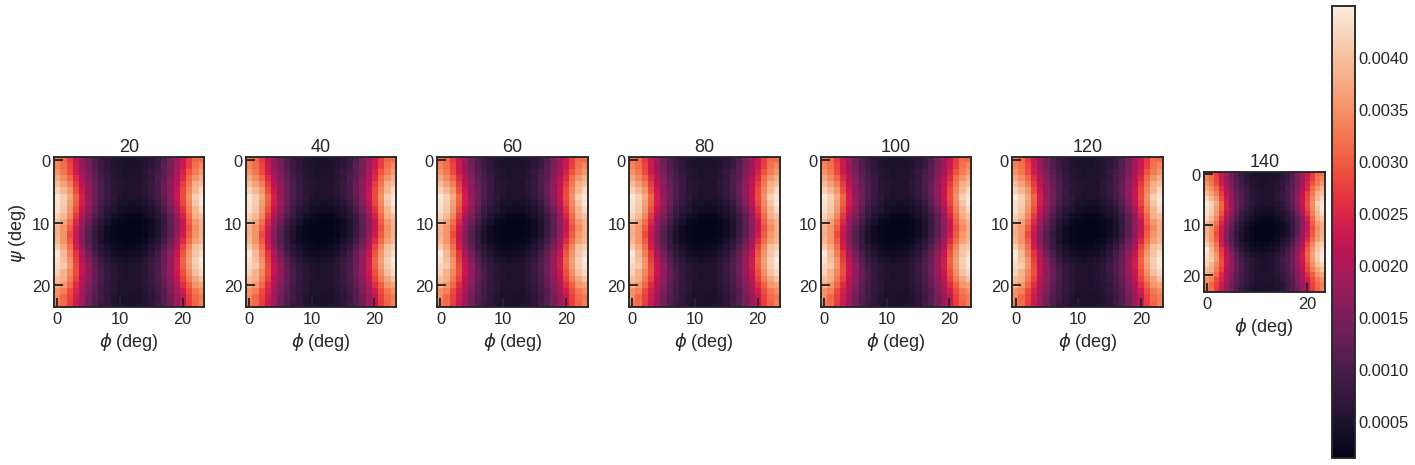

In [127]:
sim='ensemble'
Nbins = 24
residues = [20, 40, 60, 80, 100, 120, 140]
step=1#int(floor(len(u.trajectory)/1000))


XTC = '../ensemble/ensemble.dcd'
PDB = '../ensemble/18.rebuilt.pdb'

u = mda.Universe(PDB, XTC)

fig, ax = plt.subplots(nrows=1, ncols=len(residues),figsize=(20,9))

for n, el in enumerate(residues):
    ax[n].set_aspect('equal')
    nres = str(el)
    r = u.select_atoms("resid "+nres)
    R = Ramachandran(r).run(step=step)
    ax[n].set_title(nres)

    x = R.angles[:, :, 0].flatten() #phi
    y = R.angles[:, :, 1].flatten() #psi
    NpointsFM = len(x)
    
    delta = int(360/Nbins)
    bin_i = [n for n in range(-180, 179, delta)]
    
    indsFMphi = np.digitize(x, bin_i)
    
    all_values = []
    
    for bcounter, bi in enumerate(bin_i):
        selectedFMpsi = [el for acounter, el in enumerate(y) if indsFMphi[acounter]==bcounter+1]
        indsFMpsi = np.digitize(selectedFMpsi, bin_i)
        unique, counts = np.unique(indsFMpsi, return_counts=True)
        counts = dict(zip(unique, counts))
        popFM = [counts[acounter+1]/NpointsFM if (acounter+1) in counts.keys() else 1e-24
                                     for acounter, el in enumerate(bin_i)]
        all_values.append(popFM)

    #all_values = ndimage.rotate(all_values, 90)
    
    all_values = convolve(all_values, Gaussian2DKernel(x_stddev=0.75, y_stddev=0.75))
    all_values = np.abs(all_values)
    all_values = all_values/sum(sum(all_values))
    
    RT = 1.98720425864083*1e-3*298
    
    cmap = [[-RT*np.log(a/b) for a, b in zip(all_values[bc], ref_rama[bc]) ] for bc in range(Nbins)]
    
    #cmap = convolve(cmap, Gaussian2DKernel(x_stddev=0.75, y_stddev=0.75))
    
    #cmap = all_values/sum(sum(cmap))
    
    rp = ax[n].imshow(ref_rama, interpolation=None)
    ax[n].set_xlabel('$\phi$ (deg)')
    if n==0:
        ax[n].set_ylabel('$\psi$ (deg)')
        fig.colorbar(rp)
    #ax[n].set_xlim([-180,180])
    #ax[n].set_ylim([-180,180])
    ax[n].set_aspect('equal')

plt.tight_layout()
plt.savefig("convoluted-cmap.pdf", dpi=300)

/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


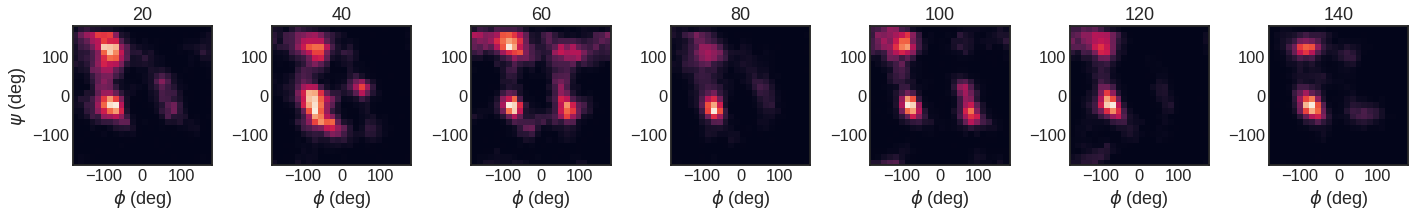

In [13]:
sim='20210531'
Nbins = 24
residues = [20, 40, 60, 80, 100, 120, 140]
step=1


XTC = sim+'/all.dcd'
PDB = sim+'/1/CG.pdb'

u = mda.Universe(PDB, XTC)
step=1#int(floor(len(u.trajectory)/1000))

fig, ax = plt.subplots(nrows=1, ncols=len(residues),figsize=(20,9))

for n, el in enumerate(residues):
    ax[n].set_aspect('equal')
    nres = str(el)
    r = u.select_atoms("resid "+nres)
    R = Ramachandran(r).run(step=step)
    ax[n].set_title(nres)

    x = R.angles[:, :, 0].flatten()
    y = R.angles[:, :, 1].flatten()
    
    if el == 80:
        outx = x
        outy = y

    ax[n].hist2d(x, y, bins=(Nbins, Nbins), range=[[-180,180], [-180,180]])
    ax[n].set_xlabel('$\phi$ (deg)')
    if n==0:
        ax[n].set_ylabel('$\psi$ (deg)')
    ax[n].set_xlim([-180,180])
    ax[n].set_ylim([-180,180])
    ax[n].set_aspect('equal')

plt.tight_layout()
plt.savefig("rama-"+sim+".pdf", dpi=300)

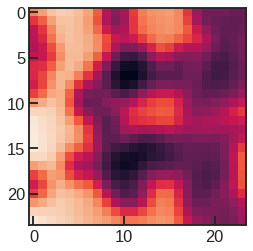

In [16]:
temp="20210531/60.cmap"
temp=np.genfromtxt(temp)
plt.imshow(temp)

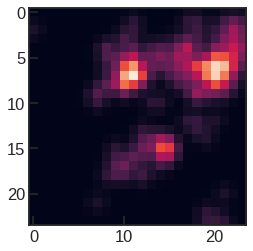

In [23]:
temp="20210531/20.rama"
temp=np.genfromtxt(temp)
plt.imshow(temp)

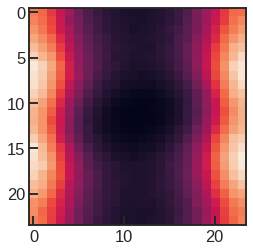

In [14]:
temp="all-rama-ref.out" 
temp=np.genfromtxt(temp)
plt.imshow(temp)

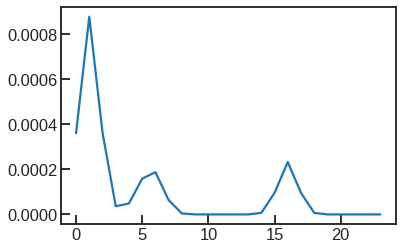

In [112]:
plt.plot(temp[:, 2])

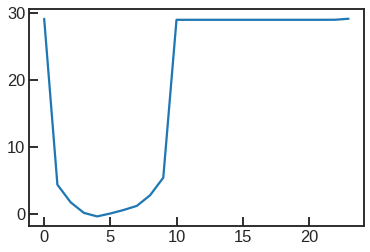

In [77]:
plt.plot(temp[:, 1])

In [8]:
import numpy as np

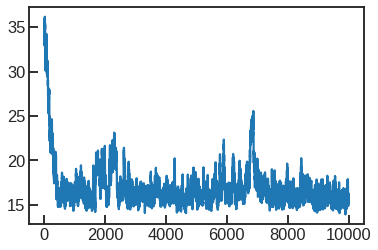

In [9]:
temp="20210531/1/rg.out"
temp=np.genfromtxt(temp)
plt.plot(temp)